# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Data Inspection

In [2]:
local_path_df_train = './datasets/hotel_train.csv'
local_path_df_test = './datasets/hotel_test.csv'
web_path_df_train = '/datasets/hotel_train.csv'
web_path_df_test = '/datasets/hotel_test.csv'

In [3]:
if os.path.exists(local_path_df_train):
  df_train_raw = pd.read_csv(local_path_df_train)
elif os.path.exists(web_path_df_train):
  df_train_raw = pd.read_csv(web_path_df_train)
if os.path.exists(local_path_df_test):
  df_test_raw = pd.read_csv(local_path_df_test)
elif os.path.exists(web_path_df_test):
  df_test_raw = pd.read_csv(web_path_df_test)

# Train data

In [4]:
print(df_train_raw.shape)

(65229, 25)


In [5]:
print(df_train_raw.columns)

Index(['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')


In [6]:
df_train = pd.DataFrame()

# is_canceled

target feature - guest canceled reservation

In [7]:
series_is_canceled = df_train_raw['is_canceled']

In [8]:
print(series_is_canceled.dtype)

int64


In [9]:
print(series_is_canceled.shape)

(65229,)


In [10]:
print(pd.unique(series_is_canceled))

[0 1]


In [11]:
print(series_is_canceled.sum() / series_is_canceled.size)

0.3686090542550093


- no missing values
- binary target value, as expected
- distribution of the answers is close to 50/50 ratio

In [12]:
print(df_train.shape)

(0, 0)


In [13]:
df_train['is_canceled'] = series_is_canceled

In [14]:
print(df_train.shape)

(65229, 1)


# lead_time

feature - number of days before reservation date

In [15]:
series_lead_time = df_train_raw['lead_time']

In [16]:
print(series_lead_time.dtype)

float64


In [17]:
print(series_lead_time.head())

0     7.0
1    14.0
2     0.0
3     9.0
4    85.0
Name: lead_time, dtype: float64


In [18]:
try:
  series_lead_time = series_lead_time.astype('int64')
except:
  print('could not convert \'lead_time\' to int54')

In [19]:
print(series_lead_time.shape)

(65229,)


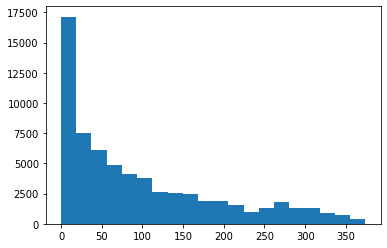

In [20]:
plt.hist(series_lead_time, bins=20)
plt.show()

- changed the data type to int64
- no missing values
- checked for the outliers, data looks uniform
- in this case quantity data will work, it ranges from short period to the longer period

In [21]:
print(df_train.shape)

(65229, 1)


In [22]:
df_train['lead_time'] = series_lead_time

In [23]:
print(df_train.shape)

(65229, 2)


# arrival_date_year

feature - year of the reservation

In [24]:
series_arrival_date_year = df_train_raw['arrival_date_year']

In [25]:
print(series_arrival_date_year.shape)

(65229,)


In [26]:
print(series_arrival_date_year.dtype)

int64


In [27]:
print(series_arrival_date_year.head())

0    2015
1    2015
2    2015
3    2015
4    2015
Name: arrival_date_year, dtype: int64


In [28]:
print(series_arrival_date_year.describe())

count    65229.000000
mean      2015.719021
std          0.449481
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2016.000000
max       2016.000000
Name: arrival_date_year, dtype: float64


- no missing values
- range from 2015 to 2016, it will scale with the scaler

In [29]:
print(df_train.shape)

(65229, 2)


In [30]:
df_train['arrival_date_year'] = series_arrival_date_year

In [31]:
print(df_train.shape)

(65229, 3)


# arrival_date_month 

feature - arrival date

In [32]:
series_arrival_date_month = df_train_raw['arrival_date_month']

In [33]:
print(series_arrival_date_month.dtype)

object


In [34]:
print(series_arrival_date_month.head())

0    July
1    July
2    July
3    July
4    July
Name: arrival_date_month, dtype: object


In [35]:
print(series_arrival_date_month.shape)

(65229,)


In [36]:
print(pd.unique(series_arrival_date_month))

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


- no missing values
- data type is object
- in the case of month it maces sense to do OHE operation
- OHE because months are very specific and it will work better with algorithms like that

In [37]:
arrival_date_month = pd.get_dummies(series_arrival_date_month)

In [38]:
print(arrival_date_month.head(2))

   April  August  December  February  January  July  June  March  May  \
0      0       0         0         0        0     1     0      0    0   
1      0       0         0         0        0     1     0      0    0   

   November  October  September  
0         0        0          0  
1         0        0          0  


In [39]:
print(df_train.shape)

(65229, 3)


In [40]:
df_train = pd.merge(df_train, arrival_date_month, left_index=True, right_index=True)

In [41]:
print(df_train.shape)

(65229, 15)


# arrival_date_week_number

feature - week of the arrival

In [42]:
series_arrival_date_week_number = df_train_raw['arrival_date_week_number']

In [43]:
print(series_arrival_date_week_number.dtype)

int64


In [44]:
print(series_arrival_date_week_number.shape)

(65229,)


In [45]:
print(series_arrival_date_week_number.head())

0    27
1    27
2    27
3    27
4    27
Name: arrival_date_week_number, dtype: int64


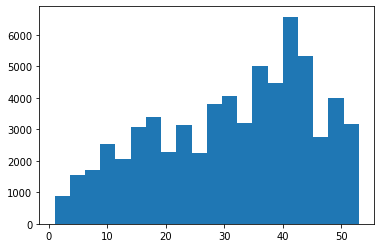

In [46]:
plt.hist(series_arrival_date_week_number, bins = 20)
plt.show()

- no missing values
- data looks uniform

In [47]:
print(df_train.shape)

(65229, 15)


In [48]:
df_train['arrival_date_week_number'] = series_arrival_date_week_number

In [49]:
print(df_train.shape)

(65229, 16)


# arrival_date_day_of_month

feature - day of month

In [50]:
series_arrival_date_day_of_month = df_train_raw['arrival_date_day_of_month']

In [51]:
print(series_arrival_date_day_of_month.dtype)

int64


In [52]:
print(series_arrival_date_day_of_month.shape)

(65229,)


In [53]:
print(series_arrival_date_day_of_month.head())

0    1
1    1
2    1
3    1
4    1
Name: arrival_date_day_of_month, dtype: int64


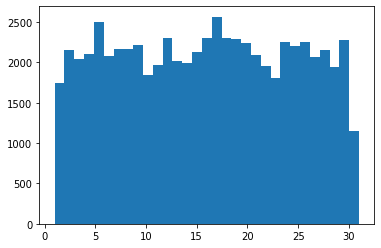

In [54]:
plt.hist(series_arrival_date_day_of_month, bins=31)
plt.show()

- no missing values
- data looks uniform

In [55]:
print(df_train.shape)

(65229, 16)


In [56]:
df_train['arrival_date_day_of_month'] = series_arrival_date_day_of_month

In [57]:
print(df_train.shape)

(65229, 17)


# stays_in_weekend_nights

feature - number of nights over weeked

In [58]:
series_stays_in_weekend_nights = df_train_raw['stays_in_weekend_nights']

In [59]:
print(series_stays_in_weekend_nights.dtype)

int64


In [60]:
print(series_stays_in_weekend_nights.shape)

(65229,)


In [61]:
print(series_stays_in_weekend_nights.head())

0    0
1    0
2    0
3    0
4    0
Name: stays_in_weekend_nights, dtype: int64


In [62]:
print(series_stays_in_weekend_nights.describe())

count    65229.000000
mean         0.825185
std          0.853477
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: stays_in_weekend_nights, dtype: float64


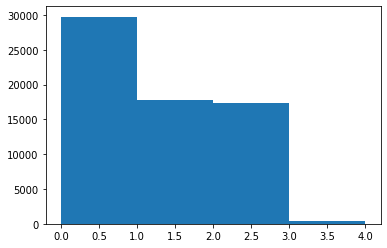

In [63]:
plt.hist(series_stays_in_weekend_nights, bins=4)
plt.show()

- no missing values
- data looks uniform

In [64]:
print(df_train.shape)

(65229, 17)


In [65]:
df_train['stays_in_weekend_nights'] = series_stays_in_weekend_nights

In [66]:
print(df_train.shape)

(65229, 18)


# stays_in_week_nights

feature - number of nights over week

In [67]:
series_stays_in_week_nights = df_train_raw['stays_in_week_nights']

In [68]:
print(series_stays_in_week_nights.dtype)

int64


In [69]:
print(series_stays_in_week_nights.shape)

(65229,)


In [70]:
print(series_stays_in_week_nights.head())

0    1
1    2
2    2
3    2
4    3
Name: stays_in_week_nights, dtype: int64


In [71]:
print(pd.unique(series_stays_in_week_nights))

[1 2 3 4 5 6 0]


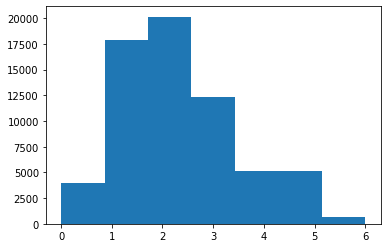

In [72]:
plt.hist(series_stays_in_week_nights, bins=7)
plt.show()

- not missing values
- data looks uniform

In [73]:
print(df_train.shape)

(65229, 18)


In [74]:
df_train['stays_in_week_nights'] = series_stays_in_week_nights

In [75]:
print(df_train.shape)

(65229, 19)


# adults

feature - number of adults

In [76]:
series_adults = df_train_raw['adults']

In [77]:
print(series_adults.dtype)

float64


In [78]:
print(pd.unique(series_adults))

[1. 2. 3. 4. 0.]


In [79]:
try:
  series_adults = series_adults.astype('int64')
except:
  print('could not convert \'adults\' to int64')

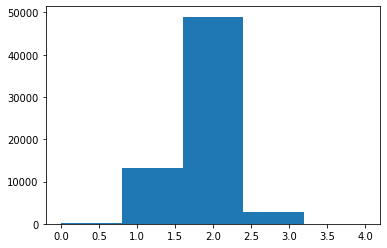

In [80]:
plt.hist(series_adults, bins=5)
plt.show()

- no missing values
- data looks uniform

In [81]:
print(df_train.shape)

(65229, 19)


In [82]:
df_train['adults'] = series_adults

In [83]:
print(df_train.shape)

(65229, 20)


# children

feature - number of children age 3 - 14

In [84]:
series_children = df_train_raw['children']

In [85]:
print(series_children.dtype)

float64


In [86]:
print(series_children.shape)

(65229,)


In [87]:
print(pd.unique(series_children))

[0. 1. 2. 3.]


In [88]:
try:
  series_children = series_children.astype('int64')
except:
  print('could not convert \'children\' to int64')

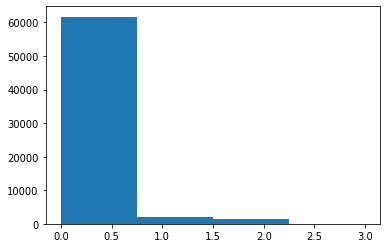

In [89]:
plt.hist(series_children, bins=4)
plt.show()

- no missing values
- data looks uniform

In [90]:
print(df_train.shape)

(65229, 20)


In [91]:
df_train['children'] = series_children

In [92]:
print(df_train.shape)

(65229, 21)


# babies

feature - number of babies age 0 - 3

In [93]:
series_babies = df_train_raw['babies']

In [94]:
print(series_babies.dtype)

float64


In [95]:
print(series_babies.shape)

(65229,)


In [96]:
print(pd.unique(series_babies))

[ 0.  1.  2. 10.  9.]


In [97]:
print(pd.value_counts(series_babies))

0.0     64777
1.0       447
2.0         3
10.0        1
9.0         1
Name: babies, dtype: int64


There must have been a mistake when entering data, those two values look like outliers. Replace them with 0

In [98]:
series_babies = series_babies.mask(series_babies > 2, 0)

In [99]:
print(pd.unique(series_babies))

[0. 1. 2.]


In [100]:
try:
  series_babies = series_babies.astype('int64')
except:
  print('could not convert \'babies\' to int64')

In [101]:
print(pd.value_counts(series_babies))

0    64779
1      447
2        3
Name: babies, dtype: int64


- no missing values
- data looks uniform

In [102]:
print(df_train.shape)

(65229, 21)


In [103]:
df_train['babies'] = series_babies

In [104]:
print(df_train.shape)

(65229, 22)


# meal

feature - the type of the meal plan a person has
- SC - no meal
- BB - breakfast
- HB - breakfast, lunch
- FB - breakfast, lunch, dinner

In [105]:
series_meal = df_train_raw['meal']

In [106]:
print(series_meal.dtype)

object


In [107]:
print(series_meal.shape)

(65229,)


In [108]:
print(pd.unique(series_meal))

['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']


In [109]:
series_meal = series_meal.str.strip()

In [110]:
print(pd.unique(series_meal))

['BB' 'FB' 'HB' 'SC']


apply OHE to this series

In [111]:
meal = pd.get_dummies(series_meal)

In [112]:
meal.head()

,BB,FB,HB,SC
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


- everything looks good
- ready to merge

In [113]:
print(df_train.shape)

(65229, 22)


In [114]:
df_train = pd.merge(df_train, meal, left_index=True, right_index=True)

In [115]:
print(df_train.shape)

(65229, 26)


# country

feature - Citizenship of the visitor

In [116]:
series_country = df_train_raw['country']

In [117]:
print(series_country.dtype)

object


In [118]:
print(series_country.shape)

(65229,)


In [119]:
print(pd.unique(series_country))

['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'ISL' 'UZB' 'IMN'
 'TJK' 'NIC' 'BEN' 'MAC' 'VGB' 'TZA' 'GAB' 'MKD' 'TMP' 'GLP' 'KEN' 'LIE'
 'MMR' 'PAN' 'BFA' 'LBY' 'GNB' 'MLI' 'BHR' 'NAM' 'BOL' 'SYC' 'PRY' 'BRB'
 'ABW' 'SLV' 'DMA' 'CUB' 'PYF' 'UGA' 'GUY' 'LCA' 'ATA' 'RWA' 'MNE']


In [120]:
country = pd.get_dummies(series_country)

- ready to merge

In [121]:
print(df_train.shape)

(65229, 26)


In [122]:
df_train = pd.merge(df_train, country, left_index=True, right_index=True)

In [123]:
print(df_train.shape)

(65229, 181)


# distribution_channel

feature - nothing to add

In [124]:
series_distribution_channel = df_train_raw['distribution_channel']

In [125]:
print(series_distribution_channel.dtype)

object


In [126]:
print(series_distribution_channel.shape)

(65229,)


In [127]:
print(pd.unique(series_distribution_channel))

['Direct' 'TA/TO' 'Corporate' 'GDS']


In [128]:
print(pd.value_counts(series_distribution_channel))

TA/TO        54454
Direct        6853
Corporate     3823
GDS             99
Name: distribution_channel, dtype: int64


OHE

In [129]:
distribution_channel = pd.get_dummies(series_distribution_channel)

In [130]:
print(distribution_channel.shape)

(65229, 4)


- no missing values
- ready to merge

In [131]:
print(df_train.shape)

(65229, 181)


In [132]:
df_train = pd.merge(df_train, distribution_channel, left_index=True, right_index=True)

In [133]:
print(df_train.shape)

(65229, 185)


# is_repeated_guest

feature - guest visited before

In [134]:
series_is_repeated_guest = df_train_raw['is_repeated_guest']

In [135]:
print(series_is_repeated_guest.dtype)

int64


In [136]:
print(series_is_repeated_guest.shape)

(65229,)


In [137]:
print(pd.unique(series_is_repeated_guest))

[0 1]


- no missing values
- simple binary data
- ready

In [138]:
print(df_train.shape)

(65229, 185)


In [139]:
df_train['is_repeated_guest'] = series_is_repeated_guest

In [140]:
print(df_train.shape)

(65229, 186)


# previous_cancellations

feature - number of cancellations for this guest

In [141]:
series_previous_cancellations = df_train_raw['previous_cancellations']

In [142]:
print(series_previous_cancellations.dtype)

int64


In [143]:
print(series_previous_cancellations.shape)

(65229,)


In [144]:
print(pd.value_counts(series_previous_cancellations))

0     59591
1      5367
2        54
3        51
11       35
24       28
25       19
26       18
19       17
5        13
13       12
14       11
6         7
4         5
21        1
Name: previous_cancellations, dtype: int64


- no missing values
- although data does not seem uniform, it will be useful for our model

In [145]:
print(df_train.shape)

(65229, 186)


In [146]:
df_train['previous_cancellations'] = series_previous_cancellations

In [147]:
print(df_train.shape)

(65229, 187)


# previous_bookings_not_canceled

feature - number of reservations that were successfully used

In [148]:
series_previous_bookings_not_canceled = df_train_raw['previous_bookings_not_canceled']

In [149]:
print(series_previous_bookings_not_canceled.dtype)

int64


In [150]:
print(series_previous_bookings_not_canceled.shape)

(65229,)


In [151]:
print(pd.unique(series_previous_bookings_not_canceled))

[ 0  1  2  3  4  5  6 10 12 13 15 21  7  9  8 11 14 18 22 16 17 19 20 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49
 50 51 52 53 54 55 56 57 58 25]


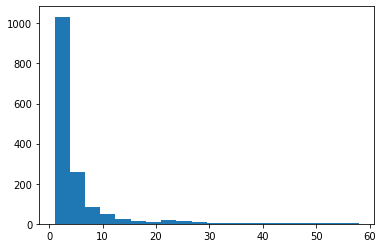

In [152]:
plt.hist(series_previous_bookings_not_canceled[series_previous_bookings_not_canceled > 0], bins=20)
plt.show()

- It might be a good idea to assume that those values are outliers but
- if that is a regular client, a businessman who visits often
- it would make them upset to have to go through reservations
- if they visited the hotel every week 50 / year for a year
- seem resonable
- no corrections needed

In [153]:
print(df_train.shape)

(65229, 187)


In [154]:
df_train['previous_bookings_not_canceled'] = series_previous_bookings_not_canceled

In [155]:
print(df_train.shape)

(65229, 188)


# reserved_room_type

feature - type of reserved room, different price categories

In [156]:
series_reserved_room_type = df_train_raw['reserved_room_type']

In [157]:
print(series_reserved_room_type.dtype)

object


In [158]:
print(series_reserved_room_type.shape)

(65229,)


In [159]:
print(pd.unique(series_reserved_room_type))

['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']


In [160]:
series_reserved_room_type = series_reserved_room_type.str.strip()

In [161]:
print(pd.unique(series_reserved_room_type))

['A' 'C' 'D' 'E' 'G' 'F' 'B']


OHE

In [162]:
reserved_room_type = pd.get_dummies(series_reserved_room_type)

In [163]:
print(reserved_room_type.shape)

(65229, 7)


- no missing values
- ready to merge

In [164]:
print(df_train.shape)

(65229, 188)


In [165]:
df_train = pd.merge(df_train, reserved_room_type, left_index=True, right_index=True)

In [166]:
print(df_train.shape)

(65229, 195)


# booking_changes

feature - number of times a person changed the reservation parameters

In [167]:
series_booking_changes = df_train_raw['booking_changes']

In [168]:
print(series_booking_changes.dtype)

int64


In [169]:
print(series_booking_changes.shape)

(65229,)


In [170]:
print(pd.unique(series_booking_changes))

[ 0  1  3  2  4  5  6 10 16  7  9 13  8 14 15 17]


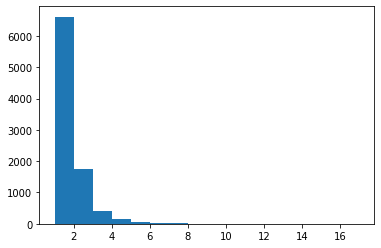

In [171]:
plt.hist(series_booking_changes[series_booking_changes > 0], bins=16)
plt.show()

- no missing values
- all of the data is useful for the model, we will not drop anything

In [172]:
print(df_train.shape)

(65229, 195)


In [173]:
df_train['booking_changes'] = series_booking_changes

In [174]:
print(df_train.shape)

(65229, 196)


# days_in_waiting_list

feature - how many days it took to confirm reservation

In [175]:
series_days_in_waiting_list = df_train_raw['days_in_waiting_list']

In [176]:
print(series_days_in_waiting_list.dtype)

int64


In [177]:
print(series_days_in_waiting_list.shape)

(65229,)


In [178]:
print(pd.unique(series_days_in_waiting_list))

[  0  50  47  65 122  75 101 150 125  22 142   2  13  44  38  48  33  77
  21  80  59  40  58  89  53  49  60  69  87  91  57  99 111  79  98  85
  63  15   3  20  93   4  41  34 224  31  39  56 187 176  71  55  96 236
 259 207 215 160 120  30  32  27  62  24 108 147   5  14 107  70   8  35
 178 174 162  68  11 193  10  76  17  45   6  19  28  42  25  46   9   1
  43  72  12  61  81  74 167]


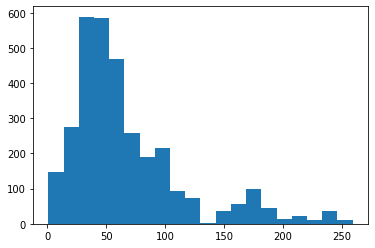

In [179]:
plt.hist(series_days_in_waiting_list[series_days_in_waiting_list > 0], bins=20)
plt.show()

- no missing values
- the distribution seems normal

In [180]:
print(df_train.shape)

(65229, 196)


In [181]:
df_train['days_in_waiting_list'] = series_days_in_waiting_list

In [182]:
print(df_train.shape)

(65229, 197)


# customer_type

feature - contract / group / transient / transient-praty

In [183]:
series_customer_type = df_train_raw['customer_type']

In [184]:
print(series_customer_type.dtype)

object


In [185]:
print(series_customer_type.shape)

(65229,)


In [186]:
print(pd.unique(series_customer_type))

['Transient' 'Contract' 'Transient-Party' 'Group']


In [187]:
customer_type = pd.get_dummies(series_customer_type)

In [188]:
print(customer_type.head())

   Contract  Group  Transient  Transient-Party
0         0      0          1                0
1         0      0          1                0
2         0      0          1                0
3         0      0          1                0
4         0      0          1                0


- no missing values
- ready to merge

In [189]:
print(df_train.shape)

(65229, 197)


In [190]:
df_train = pd.merge(df_train, customer_type, left_index=True, right_index=True)

In [191]:
print(df_train.shape)

(65229, 201)


# required_car_parking_spaces

feature - required parking spaces

In [192]:
series_required_car_parking_spaces = df_train_raw['required_car_parking_spaces']

In [193]:
print(series_required_car_parking_spaces.dtype)

int64


In [194]:
print(series_required_car_parking_spaces.shape)

(65229,)


In [195]:
print(pd.unique(series_required_car_parking_spaces))

[0 1 2 3]


- no missing values
- ready to merge

In [196]:
print(df_train.shape)

(65229, 201)


In [197]:
df_train['required_car_parking_spaces'] = series_required_car_parking_spaces

In [198]:
print(df_train.shape)

(65229, 202)


# total_of_special_requests

feature - number of special requests

In [199]:
series_total_of_special_requests = df_train_raw['total_of_special_requests']

In [200]:
print(series_total_of_special_requests.dtype)

int64


In [201]:
print(series_total_of_special_requests.shape)

(65229,)


In [202]:
print(pd.unique(series_total_of_special_requests))

[0 1 3 2 4 5]


- no missing values
- ready to merge

In [203]:
print(df_train.shape)

(65229, 202)


In [204]:
df_train['total_of_special_requests'] = series_total_of_special_requests

In [205]:
print(df_train.shape)

(65229, 203)


# total_nights

feature - total number of nights

In [206]:
series_total_nights = df_train_raw['total_nights']

In [207]:
print(series_total_nights.dtype)

int64


In [208]:
print(series_total_nights.shape)

(65229,)


In [209]:
print(pd.unique(series_total_nights))

[ 1  2  3  4  6  7  5  8 10  9]


- no missing values
- ready to merge

In [210]:
print(df_train.shape)

(65229, 203)


In [211]:
df_train['total_nights'] = series_total_nights

In [212]:
print(df_train.shape)

(65229, 204)


# id

identification

In [213]:
series_id = df_train_raw['id']

In [214]:
print(series_id.dtype)

int64


In [215]:
print(series_id.shape)

(65229,)


In [216]:
print(series_id.duplicated().sum())

0


In [217]:
print(df_train.shape)

(65229, 204)


In [218]:
df_train['id'] = series_id

In [219]:
print(df_train.shape)

(65229, 205)


# Test data

In [220]:
print(df_test_raw.shape)

(32412, 25)


In [221]:
print(df_test_raw.columns)

Index(['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')


In [222]:
df_test = pd.DataFrame()

# is_canceled

target feature - guest canceled reservation

In [223]:
series_is_canceled = df_test_raw['is_canceled']

In [224]:
print(series_is_canceled.dtype)

int64


In [225]:
print(series_is_canceled.shape)

(32412,)


In [226]:
print(pd.unique(series_is_canceled))

[1 0]


In [227]:
print(series_is_canceled.sum() / series_is_canceled.size)

0.3884672343576453


- no missing values
- binary target value, as expected
- distribution of the answers is close to 50/50 ratio

In [228]:
print(df_test.shape)

(0, 0)


In [229]:
df_test['is_canceled'] = series_is_canceled

In [230]:
print(df_test.shape)

(32412, 1)


# lead_time

feature - number of days before reservation date

In [231]:
series_lead_time = df_test_raw['lead_time']

In [232]:
print(series_lead_time.dtype)

float64


In [233]:
print(series_lead_time.head())

0     74.0
1     62.0
2     62.0
3     71.0
4    172.0
Name: lead_time, dtype: float64


In [234]:
try:
  series_lead_time = series_lead_time.astype('int64')
except:
  print('could not convert \'lead_time\' to int54')

In [235]:
print(series_lead_time.shape)

(32412,)


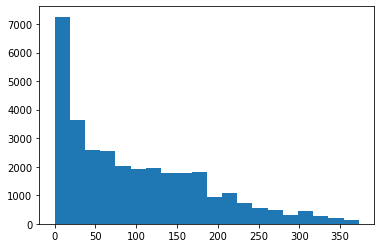

In [236]:
plt.hist(series_lead_time, bins=20)
plt.show()

- changed the data type to int64
- no missing values
- checked for the outliers, data looks uniform
- in this case quantity data will work, it ranges from short period to the longer period

In [237]:
print(df_test.shape)

(32412, 1)


In [238]:
df_test['lead_time'] = series_lead_time

In [239]:
print(df_test.shape)

(32412, 2)


# arrival_date_year

feature - year of the reservation

In [240]:
series_arrival_date_year = df_test_raw['arrival_date_year']

In [241]:
print(series_arrival_date_year.shape)

(32412,)


In [242]:
print(series_arrival_date_year.dtype)

int64


In [243]:
print(series_arrival_date_year.head())

0    2017
1    2017
2    2017
3    2017
4    2017
Name: arrival_date_year, dtype: int64


In [244]:
print(series_arrival_date_year.describe())

count    32412.0
mean      2017.0
std          0.0
min       2017.0
25%       2017.0
50%       2017.0
75%       2017.0
max       2017.0
Name: arrival_date_year, dtype: float64


- no missing values
- only 2017 year data

In [245]:
print(df_test.shape)

(32412, 2)


In [246]:
df_test['arrival_date_year'] =  series_arrival_date_year

In [247]:
print(df_test.shape)

(32412, 3)


# arrival_date_month

feature - arrival date

In [248]:
series_arrival_date_month = df_test_raw['arrival_date_month']

In [249]:
print(series_arrival_date_month.dtype)

object


In [250]:
print(series_arrival_date_month.head())

0    January
1    January
2    January
3    January
4    January
Name: arrival_date_month, dtype: object


In [251]:
print(series_arrival_date_month.shape)

(32412,)


In [252]:
print(pd.unique(series_arrival_date_month))

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


- no missing values
- data type is object
- in the case of month it maces sense to do OHE operation
- OHE because months are very specific and it will work better with algorithms like that

In [253]:
arrival_date_month = pd.get_dummies(series_arrival_date_month)

In [254]:
print(arrival_date_month.head(2))

   April  August  February  January  July  June  March  May
0      0       0         0        1     0     0      0    0
1      0       0         0        1     0     0      0    0


In [255]:
missing_months = pd.DataFrame(0, index=np.arange(32412), columns=['September', 'October', 'November', 'December'])

In [256]:
print(missing_months.head())

   September  October  November  December
0          0        0         0         0
1          0        0         0         0
2          0        0         0         0
3          0        0         0         0
4          0        0         0         0


In [257]:
print(missing_months.shape)

(32412, 4)


In [258]:
print(df_test.shape)

(32412, 3)


In [259]:
df_test = pd.merge(df_test, arrival_date_month, left_index=True, right_index=True)
df_test = pd.merge(df_test, missing_months, left_index=True, right_index=True)

In [260]:
print(df_test.shape)

(32412, 15)


# arrival_date_week_number

feature - wekk of the arrival

In [261]:
series_arrival_date_week_number = df_test_raw['arrival_date_week_number']

In [262]:
print(series_arrival_date_week_number.dtype)

int64


In [263]:
print(series_arrival_date_week_number.shape)

(32412,)


In [264]:
print(series_arrival_date_week_number.head())

0    1
1    1
2    1
3    1
4    1
Name: arrival_date_week_number, dtype: int64


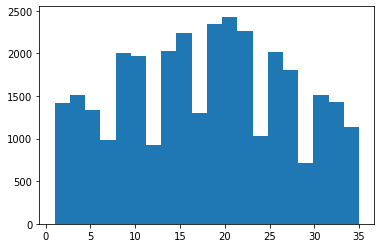

In [265]:
plt.hist(series_arrival_date_week_number, bins = 20)
plt.show()

- no missing values
- data looks uniform
- note: no data on the late 2017 period of the year

In [266]:
print(df_test.shape)

(32412, 15)


In [267]:
df_test['arrival_date_week_number'] = series_arrival_date_week_number

In [268]:
print(df_test.shape)

(32412, 16)


# arrival_date_day_of_month

feature - day of month

In [269]:
series_arrival_date_day_of_month = df_test_raw['arrival_date_day_of_month']

In [270]:
print(series_arrival_date_day_of_month.dtype)

int64


In [271]:
print(series_arrival_date_day_of_month.shape)

(32412,)


In [272]:
print(series_arrival_date_day_of_month.head())

0    1
1    1
2    1
3    1
4    1
Name: arrival_date_day_of_month, dtype: int64


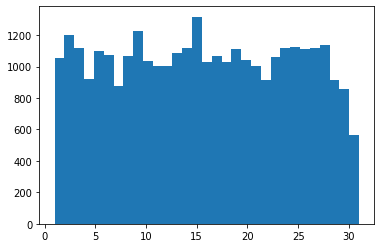

In [273]:
plt.hist(series_arrival_date_day_of_month, bins=31)
plt.show()

- no missing values
- data looks uniform

In [274]:
print(df_test.shape)

(32412, 16)


In [275]:
df_test['arrival_date_day_of_month'] = series_arrival_date_day_of_month

In [276]:
print(df_test.shape)

(32412, 17)


# stays_in_weekend_nights

feature - number of nights over weekend

In [277]:
series_stays_in_weekend_nights = df_test_raw['stays_in_weekend_nights']

In [278]:
print(series_stays_in_weekend_nights.dtype)

int64


In [279]:
print(series_stays_in_weekend_nights.shape)

(32412,)


In [280]:
print(pd.unique(series_stays_in_weekend_nights))

[1 2 0 4 3]


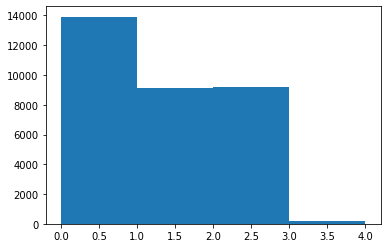

In [281]:
plt.hist(series_stays_in_weekend_nights, bins=4)
plt.show()

- no missing values
- data looks uniform

In [282]:
print(df_test.shape)

(32412, 17)


In [283]:
df_test['stays_in_weekend_nights'] = series_stays_in_weekend_nights

In [284]:
print(df_test.shape)

(32412, 18)


# stays_in_week_nights

feature - number of nights over week

In [285]:
series_stays_in_week_nights = df_train_raw['stays_in_week_nights']

In [286]:
print(series_stays_in_week_nights.dtype)

int64


In [287]:
print(series_stays_in_weekend_nights.shape)

(32412,)


In [288]:
print(pd.unique(series_stays_in_week_nights))

[1 2 3 4 5 6 0]


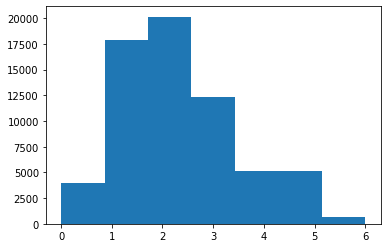

In [289]:
plt.hist(series_stays_in_week_nights, bins=7)
plt.show()

- not missing values
- data looks uniform

In [290]:
print(df_test.shape)

(32412, 18)


In [291]:
df_test['stays_in_week_nights'] = series_stays_in_week_nights

In [292]:
print(df_test.shape)

(32412, 19)


# adults

feature - number of adults

In [293]:
series_adults = df_test_raw['adults']

In [294]:
print(series_adults.dtype)

float64


In [295]:
print(pd.unique(series_adults))

[2. 1. 3. 4. 0.]


In [296]:
try:
  series_adults = series_adults.astype('int64')
except:
  print('could not convert \'adults\' to int64')

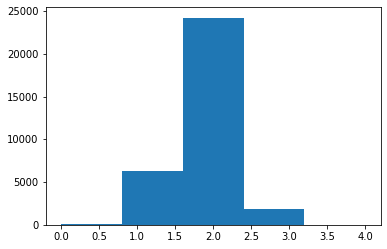

In [297]:
plt.hist(series_adults, bins=5)
plt.show()

- no missing values
- data looks uniform

In [298]:
print(df_test.shape)

(32412, 19)


In [299]:
df_test['adults'] = series_adults

In [300]:
print(df_test.shape)

(32412, 20)


# children

feature - number of children age 3-14

In [301]:
series_children = df_test_raw['children']

In [302]:
print(series_children.dtype)

float64


In [303]:
print(series_children.shape)

(32412,)


In [304]:
print(pd.unique(series_children))

[0. 2. 1. 3.]


In [305]:
try:
  series_children = series_children.astype('int64')
except:
  print('could not convert \'children\' to int64')

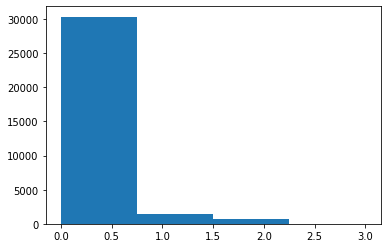

In [306]:
plt.hist(series_children, bins=4)
plt.show()

- no missing values
- data looks uniform

In [307]:
print(df_test.shape)

(32412, 20)


In [308]:
df_test['children'] = series_children

In [309]:
print(df_test.shape)

(32412, 21)


# babies

feature - number of babies age 0 - 3

In [310]:
series_babies = df_test_raw['babies']

In [311]:
print(series_babies.dtype)

float64


In [312]:
print(series_babies.shape)

(32412,)


In [313]:
print(pd.unique(series_babies))

[0. 1. 2.]


In [314]:
try:
  series_babies = series_babies.astype('int64')
except:
  print('could not convert \'babies\' to int64')

In [315]:
print(pd.value_counts(series_babies))

0    32237
1      171
2        4
Name: babies, dtype: int64


- no missing values
- data looks uniform

In [316]:
print(df_test.shape)

(32412, 21)


In [317]:
df_test['babies'] = series_babies

In [318]:
print(df_test.shape)

(32412, 22)


# meal

feature - the type of the meal plan a person has
- SC - no meal
- BB - breakfast
- HB - breakfast, lunch
- FB - breakfast, lunch, dinner

In [319]:
series_meal = df_test_raw['meal']

In [320]:
print(series_meal.dtype)

object


In [321]:
print(series_meal.shape)

(32412,)


In [322]:
print(pd.unique(series_meal))

['BB       ' 'HB       ' 'SC' 'FB       ' 'SC       ']


In [323]:
series_meal = series_meal.str.strip()

In [324]:
print(pd.unique(series_meal))

['BB' 'HB' 'SC' 'FB']


apply OHE to this series

In [325]:
meal = pd.get_dummies(series_meal)

In [326]:
meal.head()

,BB,FB,HB,SC
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


- everything looks good
- ready to merge

In [327]:
print(df_test.shape)

(32412, 22)


In [328]:
df_test = pd.merge(df_test, meal, left_index=True, right_index=True)

In [329]:
print(df_test.shape)

(32412, 26)


# country

feature - Citizenship of the visitor

In [330]:
series_country_test = df_test_raw['country']

In [331]:
print(series_country_test.dtype)

object


In [332]:
print(series_country_test.shape)

(32412,)


In [474]:
countries = pd.unique(series_country)
countries_test = pd.unique(series_country_test)

print(list(set(countries_test) - set(countries)))
print(list(set(countries) - set(countries_test)))

['MYT', 'GTM', 'KIR', 'ASM', 'TGO', 'FRO', 'CAF', 'NPL', 'SLE', 'GHA', 'UMI', 'MRT', 'BHS', 'NCL', 'MDG', 'FJI', 'LAO', 'SDN', 'ATF']
['TMP', 'RWA', 'PLW', 'KNA', 'GEO', 'VGB', 'BRB', 'BWA', 'MMR', 'DMA', 'NAM', 'GGY', 'MLI', 'CYM', 'ARM', 'GUY', 'SMR', 'GLP', 'PYF', 'BOL', 'KHM', 'UGA', 'BFA', 'HND', 'OMN', 'NIC', 'LCA', 'ZMB', 'BDI', 'MKD', 'MWI']


In [334]:
country = pd.get_dummies(series_country_test)

- ready to merge

In [335]:
print(df_test.shape)

(32412, 26)


In [336]:
df_test = pd.merge(df_test, country, left_index=True, right_index=True)

In [337]:
print(df_test.shape)

(32412, 169)


# distribution_channel

feature - nothing to add

In [338]:
series_distribution_channel = df_test_raw['distribution_channel']

In [339]:
print(series_distribution_channel.dtype)

object


In [340]:
print(series_distribution_channel.shape)

(32412,)


In [341]:
print(pd.unique(series_distribution_channel))

['TA/TO' 'Direct' 'Corporate' 'GDS']


In [342]:
print(pd.value_counts(series_distribution_channel))

TA/TO        27083
Direct        3642
Corporate     1602
GDS             85
Name: distribution_channel, dtype: int64


OHE

In [343]:
distribution_channel = pd.get_dummies(series_distribution_channel)

In [344]:
print(distribution_channel.shape)

(32412, 4)


- no missing values
- ready to merge

In [345]:
print(df_test.shape)

(32412, 169)


In [346]:
df_test = pd.merge(df_test, distribution_channel, left_index=True, right_index=True)

In [347]:
print(df_test.shape)

(32412, 173)


# is_repeated_guest

feature - guest visited before

In [348]:
series_is_repeated_guest = df_test_raw['is_repeated_guest']

In [349]:
print(series_is_repeated_guest.dtype)

int64


In [350]:
print(series_is_repeated_guest.shape)

(32412,)


In [351]:
print(pd.unique(series_is_repeated_guest))

[0 1]


- no missing values
- simple binary data
- ready

In [352]:
print(df_test.shape)

(32412, 173)


In [353]:
df_test['is_repeated_guest'] = series_is_repeated_guest

In [354]:
print(df_test.shape)

(32412, 174)


# previous_cancellations

feature - number of cancellations for this guest

In [355]:
series_previous_cancellations = df_test_raw['previous_cancellations']

In [356]:
print(series_previous_cancellations.dtype)

int64


In [357]:
print(series_previous_cancellations.shape)

(32412,)


In [358]:
print(pd.value_counts(series_previous_cancellations))

0    32186
1      165
2       29
6       15
4       10
3        6
5        1
Name: previous_cancellations, dtype: int64


- no missing values

In [359]:
print(df_test.shape)

(32412, 174)


In [360]:
df_test['previous_cancellations'] = series_previous_cancellations

In [361]:
print(df_test.shape)

(32412, 175)


# previous_bookings_not_canceled

feature - number of reservations that were successfully used

In [362]:
series_previous_bookings_not_canceled = df_test_raw['previous_bookings_not_canceled']

In [363]:
print(series_previous_bookings_not_canceled.dtype)

int64


In [364]:
print(series_previous_bookings_not_canceled.shape)

(32412,)


In [365]:
print(pd.unique(series_previous_bookings_not_canceled))

[ 0  3  2  5  6  7  8 10 11 12  4  1  9 25 27 28 30 13 14 23 24 26 16 15
 17 18 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 19 29 20 21 22]


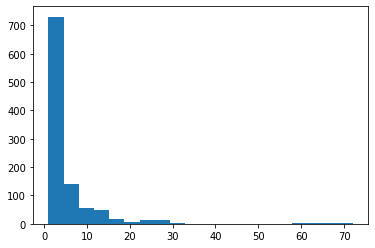

In [366]:
plt.hist(series_previous_bookings_not_canceled[series_previous_bookings_not_canceled > 0], bins=20)
plt.show()

- It might be a good idea to assume that those values are outliers but
- if that is a regular client, a businessman who visits often
- it would make them upset to have to go through reservations
- if they visited the hotel every week 50 / year for a year
- seem resonable
- no corrections needed

In [367]:
print(df_test.shape)

(32412, 175)


In [368]:
df_test['previous_bookings_not_canceled'] = series_previous_bookings_not_canceled

In [369]:
print(df_test.shape)

(32412, 176)


# reserved_room_type

feature - type of reserved room, different price categories

In [370]:
series_reserved_room_type = df_test_raw['reserved_room_type']

In [371]:
print(series_reserved_room_type.dtype)

object


In [372]:
print(series_reserved_room_type.shape)

(32412,)


In [373]:
print(pd.unique(series_reserved_room_type))

['A               ' 'E               ' 'G               '
 'D               ' 'F               ' 'C               '
 'B               ']


In [374]:
series_reserved_room_type = series_reserved_room_type.str.strip()

In [375]:
print(pd.unique(series_reserved_room_type))

['A' 'E' 'G' 'D' 'F' 'C' 'B']


OHE

In [376]:
reserved_room_type = pd.get_dummies(series_reserved_room_type)

In [377]:
print(reserved_room_type.shape)

(32412, 7)


- no missing values
- ready to merge

In [378]:
print(df_test.shape)

(32412, 176)


In [379]:
df_test = pd.merge(df_test, reserved_room_type, left_index=True, right_index=True)

In [380]:
print(df_test.shape)

(32412, 183)


# booking_changes

feature - number of times a person changed the reservation parameters

In [381]:
series_booking_changes = df_test_raw['booking_changes']

In [382]:
print(series_booking_changes.dtype)

int64


In [383]:
print(series_booking_changes.shape)

(32412,)


In [384]:
print(pd.unique(series_booking_changes))

[ 0  1  2  3  4  6  5  7 18 15 16 14  8 11 10]


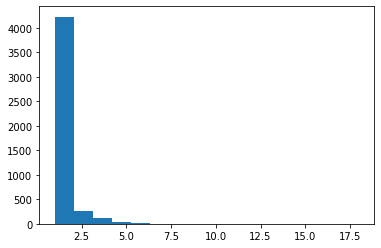

In [385]:
plt.hist(series_booking_changes[series_booking_changes > 0], bins=16)
plt.show()

- no missing values
- all of the data is useful for the model, we will not drop anything

In [386]:
print(df_test.shape)

(32412, 183)


In [387]:
df_test['booking_changes'] = series_booking_changes

In [388]:
print(df_test.shape)

(32412, 184)


# days_in_waiting_list

feature - how many days it took to confirm reservation

In [389]:
series_days_in_waiting_list = df_test_raw['days_in_waiting_list']

In [390]:
print(series_days_in_waiting_list.dtype)

int64


In [391]:
print(series_days_in_waiting_list.shape)

(32412,)


In [392]:
print(pd.unique(series_days_in_waiting_list))

[  0  14  60 100 121  61   5   1 107  43 122  83   4 113  18  20 185  93
 109  34   6  13   8 154  64  99  76  16  22  28  21   9 165   2  44  17
  53  38  50 111  25  46   7  47  27  49  84  30 175 183  39  56  31  10
  15  23  63  33  32  11  35 117  57  12  80  71  54  59  26  73 223 105
  65  36  98]


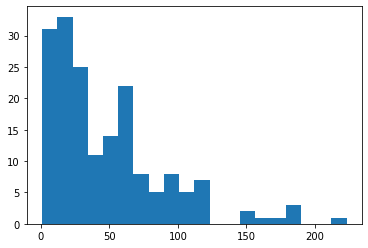

In [393]:
plt.hist(series_days_in_waiting_list[series_days_in_waiting_list > 0], bins=20)
plt.show()

- no missing values
- the distribution seems normal

In [394]:
print(df_test.shape)

(32412, 184)


In [395]:
df_test['days_in_waiting_list'] = series_days_in_waiting_list

In [396]:
print(df_test.shape)

(32412, 185)


# customer_type

feature - contract / group / transient / transient-party

In [397]:
series_customer_type = df_test_raw['customer_type']

In [398]:
print(series_customer_type.dtype)

object


In [399]:
print(series_customer_type.shape)

(32412,)


In [400]:
print(pd.unique(series_customer_type))

['Transient' 'Transient-Party' 'Contract' 'Group']


In [401]:
customer_type = pd.get_dummies(series_customer_type)

In [402]:
print(customer_type.head())

   Contract  Group  Transient  Transient-Party
0         0      0          1                0
1         0      0          1                0
2         0      0          1                0
3         0      0          1                0
4         0      0          1                0


In [403]:
print(customer_type.shape)

(32412, 4)


- no missing values
- ready to merge

In [404]:
print(df_test.shape)

(32412, 185)


In [405]:
df_test = pd.merge(df_test, customer_type, left_index=True, right_index=True)

In [406]:
print(df_test.shape)

(32412, 189)


# required_car_parking_spaces

feature - required parking spaces

In [407]:
series_required_car_parking_spaces = df_test_raw['required_car_parking_spaces']

In [408]:
print(series_required_car_parking_spaces.dtype)

int64


In [409]:
print(series_required_car_parking_spaces.shape)

(32412,)


In [410]:
print(pd.unique(series_required_car_parking_spaces))

[0 1 2 8 3]


In [411]:
print(pd.value_counts(series_required_car_parking_spaces))

0    30935
1     1468
2        6
8        2
3        1
Name: required_car_parking_spaces, dtype: int64


- we don't have 8 parking spots in the training data
- but we will not remove it, it should not affect the model too much
- no missing values
- ready to merge

In [412]:
print(df_test.shape)

(32412, 189)


In [413]:
df_test['required_car_parking_spaces'] = series_required_car_parking_spaces

In [414]:
print(df_test.shape)

(32412, 190)


# total_of_special_requests

feature - number of special requests

In [415]:
series_total_of_special_requests = df_test_raw['total_of_special_requests']

In [416]:
print(series_total_of_special_requests.dtype)

int64


In [417]:
print(series_total_of_special_requests.shape)

(32412,)


In [418]:
print(pd.unique(series_total_of_special_requests))

[0 1 2 3 4 5]


- no missing values
- ready to merge

In [419]:
print(df_test.shape)

(32412, 190)


In [420]:
df_test['total_of_special_requests'] = series_total_of_special_requests

In [421]:
print(df_test.shape)

(32412, 191)


# total_nights

feature - total number of nights

In [422]:
series_total_nights = df_test_raw['total_nights']

In [423]:
print(series_total_nights.dtype)

int64


In [424]:
print(series_total_nights.shape)

(32412,)


In [425]:
print(pd.unique(series_total_nights))

[ 1  4  7  2  5  6  3  8  9 10]


- no missing values
- ready to merge

In [426]:
print(df_test.shape)

(32412, 191)


In [427]:
df_test['total_nights'] = series_total_nights

In [428]:
print(df_test.shape)

(32412, 192)


# id

identification

In [429]:
series_id = df_test_raw['id']

In [430]:
print(series_id.dtype)

int64


In [431]:
print(series_id.shape)

(32412,)


In [432]:
print(series_id.duplicated().sum())

0


In [433]:
print(df_test.shape)

(32412, 192)


In [434]:
df_test['id'] = series_id

In [435]:
print(df_test.shape)

(32412, 193)


# BUSINESS

What is the income without deposits?

People who showed up and payed vs people who didn't show up

price factors:
- showed up
- season
- room type
- duration of the stay

In [436]:
df_business = df_train_raw[['is_canceled', 'arrival_date_month', 'arrival_date_year', 'reserved_room_type', 'total_nights']]

In [437]:
print(pd.unique(df_business['is_canceled']))

[0 1]


In [438]:
print(pd.unique(df_business['arrival_date_month']))

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [439]:
print(pd.unique(df_business['arrival_date_year']))

[2015 2016]


In [440]:
print(pd.unique(df_business['reserved_room_type']))

['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']


In [441]:
df_business['reserved_room_type'] = df_business['reserved_room_type'].str.strip()

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_2491/1553549690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['reserved_room_type'] = df_business['reserved_room_type'].str.strip()


In [442]:
print(pd.unique(df_business['reserved_room_type']))

['A' 'C' 'D' 'E' 'G' 'F' 'B']


In [443]:
print(pd.unique(df_business['total_nights']))

[ 1  2  3  4  6  7  5  8 10  9]


In [444]:
price_room_type = {
  'A':1000,
  'B':800,
  'C':600,
  'D':550,
  'E':500,
  'F':450,
  'G':350
}
price_cleaning_room_type = {
  'A':400,
  'B':350,
  'C':350,
  'D':150,
  'E':150,
  'F':150,
  'G':150
}

In [445]:
price_multiplier_month = {
  'July': 1.4,
  'August': 1.4,
  'September': 1.2,
  'October': 1.2,
  'November': 1.2,
  'December': 1.0,
  'January': 1.0,
  'February': 1.0,
  'March': 1.2,
  'April': 1.2,
  'May': 1.2,
  'June': 1.4
}

In [446]:
def calculate_income(row):
  room_type = row['reserved_room_type']
  month = row['arrival_date_month']
  n_nights = row['total_nights']
  price_room = price_room_type[room_type]
  price_cleaning_room = price_cleaning_room_type[room_type]
  season_coefficient = price_multiplier_month[month]
  if (row['is_canceled'] == 1):
    return (price_room + price_cleaning_room) * season_coefficient * -1
  return ((price_room * n_nights) + (price_cleaning_room * (n_nights // 2))) * season_coefficient
  

In [447]:
df_business['costs'] = df_business.apply(lambda row: calculate_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_2491/1269056741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['costs'] = df_business.apply(lambda row: calculate_income(row), axis=1)


In [448]:
print(df_business.head(10))

   is_canceled arrival_date_month  arrival_date_year reserved_room_type  \
0            0               July               2015                  A   
1            0               July               2015                  A   
2            0               July               2015                  C   
3            0               July               2015                  C   
4            1               July               2015                  A   
5            1               July               2015                  D   
6            1               July               2015                  E   
7            0               July               2015                  G   
8            0               July               2015                  D   
9            0               July               2015                  E   

   total_nights   costs  
0             1  1400.0  
1             2  3360.0  
2             2  2170.0  
3             2  2170.0  
4             3 -1960.0  
5             3  -

In [449]:
df_business_monthly = df_business[['arrival_date_month', 'arrival_date_year', 'costs']]

In [450]:
print(df_business_monthly.groupby(['arrival_date_year', 'arrival_date_month']).sum())

                                          costs
arrival_date_year arrival_date_month           
2015              August              5498990.0
                  December            3435350.0
                  July                3048150.0
                  November            4740120.0
                  October             7792800.0
                  September           7020180.0
2016              April               7489440.0
                  August              8752030.0
                  December            4735900.0
                  February            4243950.0
                  January             2728100.0
                  July                9205350.0
                  June                8029910.0
                  March               8405460.0
                  May                 8235960.0
                  November            6829920.0
                  October             7533840.0
                  September           7568280.0


# MODEL

In [451]:
df_train_target = df_train['is_canceled']
df_train_features = df_train.drop(['is_canceled', 'id'], axis=1)

In [452]:
scaler = StandardScaler()
df_train_features = scaler.fit_transform(df_train_features)

In [453]:
tree_depths = range(1, 11)
for tree_depth in tree_depths:
  model = DecisionTreeClassifier(max_depth=tree_depth, random_state=12345)
  scores = cross_val_score(model, df_train_features, df_train_target, scoring='f1', cv=5)
  print('Depth:', tree_depth)
  print('Score:', sum(scores) / len(scores))
  

Depth: 1
Score: 0.1496690134788227
Depth: 2
Score: 0.3426567553490775
Depth: 3
Score: 0.6299142220361345
Depth: 4
Score: 0.577759577161072
Depth: 5
Score: 0.5496828227199269
Depth: 6
Score: 0.47199099481089213
Depth: 7
Score: 0.5135618953760521
Depth: 8
Score: 0.48344415616677094
Depth: 9
Score: 0.4820582013814011
Depth: 10
Score: 0.45165979961430525


In [454]:
tree_counts = range(10, 40, 10)
tree_depths = range(1, 11)
for tree_count in tree_counts:
  print('tree_count', tree_count)
  current_scores = []
  for tree_depth in tree_depths:
    model = RandomForestClassifier(n_estimators=tree_count, max_depth=tree_depth, random_state=12345)
    scores = cross_val_score(model, df_train_features, df_train_target, scoring='f1', cv=5)
    current_scores.append(sum(scores) / len(scores))
  max_score = max(current_scores)
  max_score_index = current_scores.index(max_score)
  print('best tree depth', max_score_index + 5)
  print('best score', max_score)

tree_count 10
best tree depth 11
best score 0.5276953848727192
tree_count 20
best tree depth 10
best score 0.5403468855684342
tree_count 30
best tree depth 10
best score 0.5171364517854763


In [455]:
model = LogisticRegression(solver='liblinear', random_state=12345)
scores = cross_val_score(model, df_train_features, df_train_target, scoring='f1', cv=5)
print('LogisticRegression score', sum(scores) / len(scores))

LogisticRegression score 0.4830694455375039


the best model is DecisionTreeClassifier with max_depth = 3

In [456]:
model = DecisionTreeClassifier(max_depth=3, random_state=12345)
model.fit(df_train_features, df_train_target)
series_predicted = model.predict(df_train_features)

In [457]:
df_business['predicted'] = series_predicted

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_2491/1095536524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['predicted'] = series_predicted


In [458]:
def calculate_model_income(row):
  room_type = row['reserved_room_type']
  month = row['arrival_date_month']
  n_nights = row['total_nights']
  price_room = price_room_type[room_type]
  price_cleaning_room = price_cleaning_room_type[room_type]
  season_coefficient = price_multiplier_month[month]
  if (row['is_canceled'] == 1):
    if(row['predicted'] == 1):
      # 80% of money will be saved, by customer loosing his deposit
      return (price_room + price_cleaning_room) * season_coefficient * -1 * 0.2
    return (price_room + price_cleaning_room) * season_coefficient * -1
  return ((price_room * n_nights) + (price_cleaning_room * (n_nights // 2))) * season_coefficient

In [459]:
df_business['model_costs'] = df_business.apply(lambda row: calculate_model_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_2491/2648823243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['model_costs'] = df_business.apply(lambda row: calculate_model_income(row), axis=1)


Lets look at year 2016 and find how much money we have saved

In [460]:
df_business_2016 = df_business[df_business['arrival_date_year'] == 2016]

In [461]:
total_revenue_2016 = df_business_2016['costs'].sum()
total_revenue_2016_with_model = df_business_2016['model_costs'].sum()

print('2016 raw revenue:', total_revenue_2016)
print('2016 model revenue:', total_revenue_2016_with_model)
print('Percentage increase: {:0.0f}%'.format(total_revenue_2016_with_model / total_revenue_2016 * 100))
print('Money saved:', total_revenue_2016_with_model - total_revenue_2016)

2016 raw revenue: 83758140.0
2016 model revenue: 95106100.0
Percentage increase: 114%
Money saved: 11347960.0


In [462]:
df_test_features = df_test.drop(['id', 'is_canceled'], axis=1)

In [463]:
# no need for a year, because its all 2017
df_business_2017 = df_test_raw[['is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights']]

In [464]:
print(pd.unique(df_business_2017['arrival_date_month']))

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


In [465]:
print(pd.unique(df_business_2017['reserved_room_type']))

['A               ' 'E               ' 'G               '
 'D               ' 'F               ' 'C               '
 'B               ']


In [466]:
df_business_2017['reserved_room_type'] = df_business_2017['reserved_room_type'].str.strip()

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_2491/1880790177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_2017['reserved_room_type'] = df_business_2017['reserved_room_type'].str.strip()


In [467]:
print(pd.unique(df_business_2017['reserved_room_type']))

['A' 'E' 'G' 'D' 'F' 'C' 'B']


In [468]:
df_business_2017['cost'] = df_business_2017.apply(lambda row: calculate_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_2491/1996838134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_2017['cost'] = df_business_2017.apply(lambda row: calculate_income(row), axis=1)


In [469]:
series_predicted_2017 = model.predict(df_test_features)

/Users/vlad/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 191 features, but DecisionTreeClassifier is expecting 203 features as input.